In [ ]:
import pandas as pd

file_path = 'dataset.csv'

data = pd.read_csv(file_path)
column_names = data.columns.tolist()

num_rows = len(data)

print("Column Names: ", column_names)
print("Number of Rows: ", num_rows)

Column Names:  ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
Number of Rows:  9994


In [ ]:
city_sales = data[data['Country'] == 'United States'].groupby('City')['Sales'].sum()

top_10_cities = city_sales.sort_values(ascending=False).head(10)

print("Top 10 Cities in the USA by Total Sales:")
print(top_10_cities)

Top 10 Cities in the USA by Total Sales:
City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data['Year'] = data['Order Date'].dt.year

sales_2016 = data[data['Year'] == 2016]['Sales'].sum()
sales_2017 = data[data['Year'] == 2017]['Sales'].sum()

percentage_growth = ((sales_2017 - sales_2016) / sales_2016) * 100

print("Total Sales for 2016: $", sales_2016)
print("Total Sales for 2017: $", sales_2017)
print("Percentage Growth from 2016 to 2017: {:.2f}%".format(percentage_growth))


Total Sales for 2016: $ 609205.598
Total Sales for 2017: $ 733215.2552
Percentage Growth from 2016 to 2017: 20.36%


<ipython-input-3-7a409446c23b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data['Year'] = data['Order Date'].dt.year

profit_2016 = data[data['Year'] == 2016]['Profit'].sum()
profit_2017 = data[data['Year'] == 2017]['Profit'].sum()

profit_growth_percentage = ((profit_2017 - profit_2016) / abs(profit_2016)) * 100

print("Total Profit for 2016: $", profit_2016)
print("Total Profit for 2017: $", profit_2017)
print("Profit Growth Percentage from 2016 to 2017: {:.2f}%".format(profit_growth_percentage))


Total Profit for 2016: $ 81795.17430000001
Total Profit for 2017: $ 93439.26960000001
Profit Growth Percentage from 2016 to 2017: 14.24%


In [ ]:
usa_data = data[data['Country'] == 'United States']

region_category_sales = usa_data.groupby(['Region', 'Category'])['Sales'].sum()

top_selling_categories = region_category_sales.groupby('Region').idxmax().apply(lambda x: x[1])

print("Top Selling Categories in Each Region of USA:")
print(top_selling_categories)

Top Selling Categories in Each Region of USA:
Region
Central    Technology
East       Technology
South      Technology
West        Furniture
Name: Sales, dtype: object


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data['Year'] = data['Order Date'].dt.year
data['Quarter'] = data['Order Date'].dt.quarter

filtered_data = data[data['Year'].isin([2014, 2015, 2016, 2017])]

quarterly_sales_quantity = filtered_data.groupby(['Year', 'Quarter'])[['Sales', 'Quantity']].sum()

print("Quarter-wise Sum of Sales and Quantity for 2014, 2015, 2016, and 2017:")
print(quarterly_sales_quantity)


Quarter-wise Sum of Sales and Quantity for 2014, 2015, 2016, and 2017:
                    Sales  Quantity
Year Quarter                       
2014 1         96498.7200      1438
     2         83636.8806      1518
     3        139306.0173      2097
     4        164805.8802      2528
2015 1         90952.3496      1301
     2         97852.8812      1788
     3        145554.2330      2273
     4        136173.0452      2617
2016 1        136898.6390      1782
     2        149148.5428      2394
     3        131098.5257      2561
     4        192059.8905      3100
2017 1        189519.8842      2956
     2        127696.7735      2574
     3        204221.9995      3261
     4        211776.5980      3685


In [ ]:
usa_data = data[data['Country'] == 'United States']

shipment_mode_counts = usa_data['Ship Mode'].value_counts()

most_preferred_shipment_mode = shipment_mode_counts.idxmax()

print("Most Preferred Shipment Mode in the USA:", most_preferred_shipment_mode)


Most Preferred Shipment Mode in the USA: Standard Class


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data['Year'] = data['Order Date'].dt.year

filtered_data = data[data['Year'].isin([2014, 2015, 2016, 2017])]

segment_wise_sales = filtered_data.groupby(['Year', 'Segment'])['Sales'].sum()

print("Segment-wise Total Sales for 2014, 2015, 2016, and 2017:")
print(segment_wise_sales)


Segment-wise Total Sales for 2014, 2015, 2016, and 2017:
Year  Segment    
2014  Consumer       266096.8126
      Corporate      128434.8737
      Home Office     89715.8118
2015  Consumer       266535.9333
      Corporate      128757.3069
      Home Office     75239.2688
2016  Consumer       296863.8992
      Corporate      207106.3618
      Home Office    105235.3370
2017  Consumer       331904.6999
      Corporate      241847.8244
      Home Office    159462.7309
Name: Sales, dtype: float64


In [ ]:
unique_customer_ids = data['Customer ID'].nunique()

print("Total Number of Unique Customer IDs:", unique_customer_ids)


Total Number of Unique Customer IDs: 793


In [ ]:
region_customer_counts = data[data['Country'] == 'United States'].groupby('Region')['Customer ID'].nunique()

sorted_regions = region_customer_counts.sort_values(ascending=False)

print("Regions of USA in Decreasing Order of Unique Customer IDs:")
print(sorted_regions)


Regions of USA in Decreasing Order of Unique Customer IDs:
Region
West       686
East       674
Central    629
South      512
Name: Customer ID, dtype: int64


In [ ]:
filtered_postal_codes = data[data['Postal Code'].astype(str).str.startswith(('8', '9'))]

unique_postal_codes = filtered_postal_codes['Postal Code'].nunique()

print("Total Number of Unique Postal Codes starting with 8 or 9:", unique_postal_codes)


Total Number of Unique Postal Codes starting with 8 or 9: 181


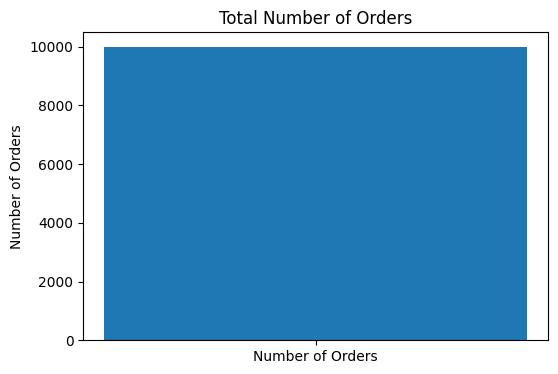

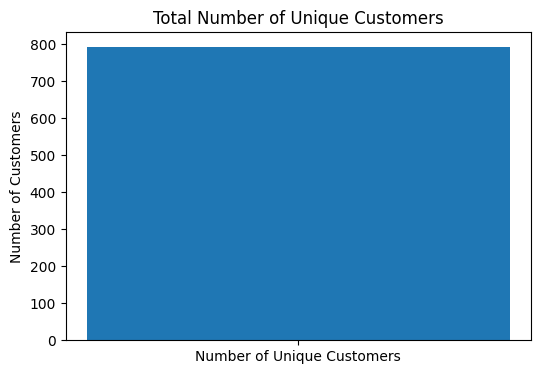

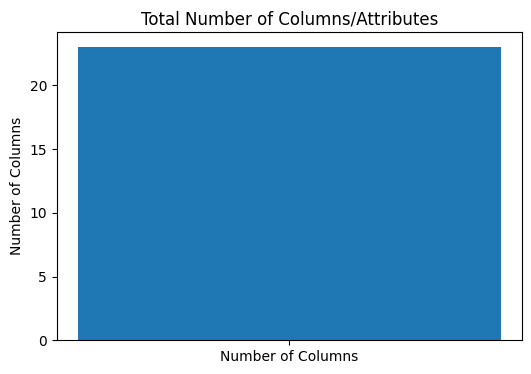

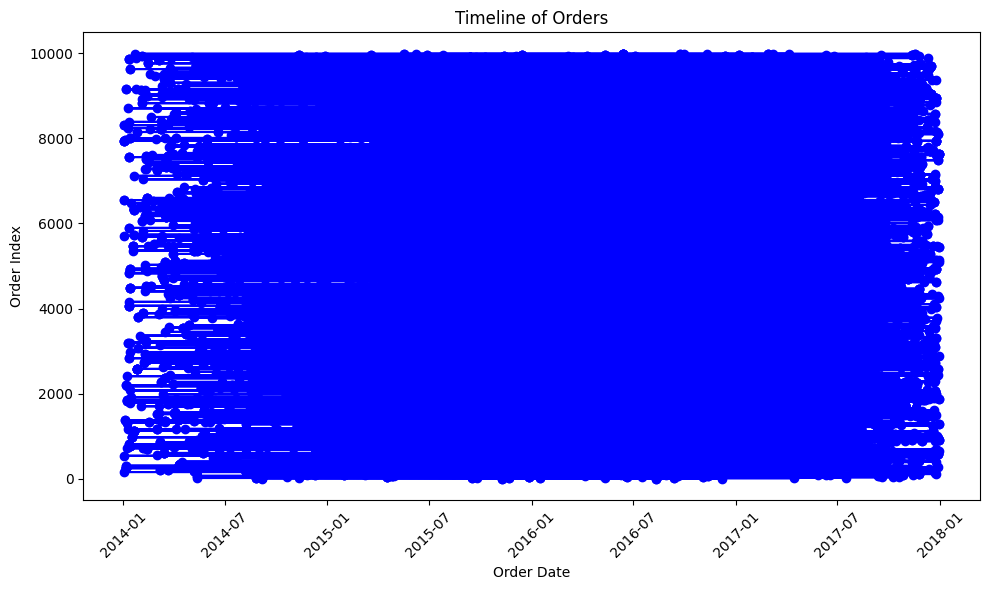

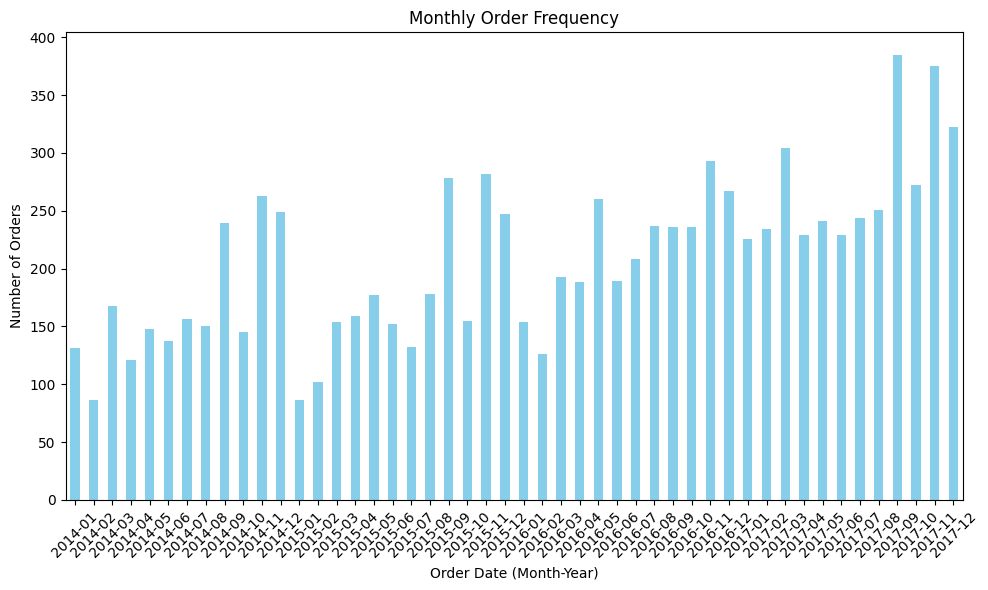

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(6, 4))
plt.bar('Number of Orders', len(data))
plt.ylabel('Number of Orders')
plt.title('Total Number of Orders')
plt.savefig('total_orders.png')
plt.show()
plt.close()

unique_customers = data['Customer ID'].nunique()
plt.figure(figsize=(6, 4))
plt.bar('Number of Unique Customers', unique_customers)
plt.ylabel('Number of Customers')
plt.title('Total Number of Unique Customers')
plt.savefig('unique_customers.png')
plt.show()
plt.close()

num_columns = len(data.columns)
plt.figure(figsize=(6, 4))
plt.bar('Number of Columns', num_columns)
plt.ylabel('Number of Columns')
plt.title('Total Number of Columns/Attributes')
plt.savefig('num_columns.png')
plt.show()
plt.close()

data['Order Date'] = pd.to_datetime(data['Order Date'])
plt.figure(figsize=(10, 6))
plt.plot(data['Order Date'], data.index, marker='o', linestyle='-', color='b')
plt.xlabel('Order Date')
plt.ylabel('Order Index')
plt.title('Timeline of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('timeline_orders.png')
plt.show()
plt.close()

order_frequency = data['Order Date'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
order_frequency.plot(kind='bar', color='skyblue')
plt.xlabel('Order Date (Month-Year)')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_order_frequency.png')
plt.show()
plt.close()


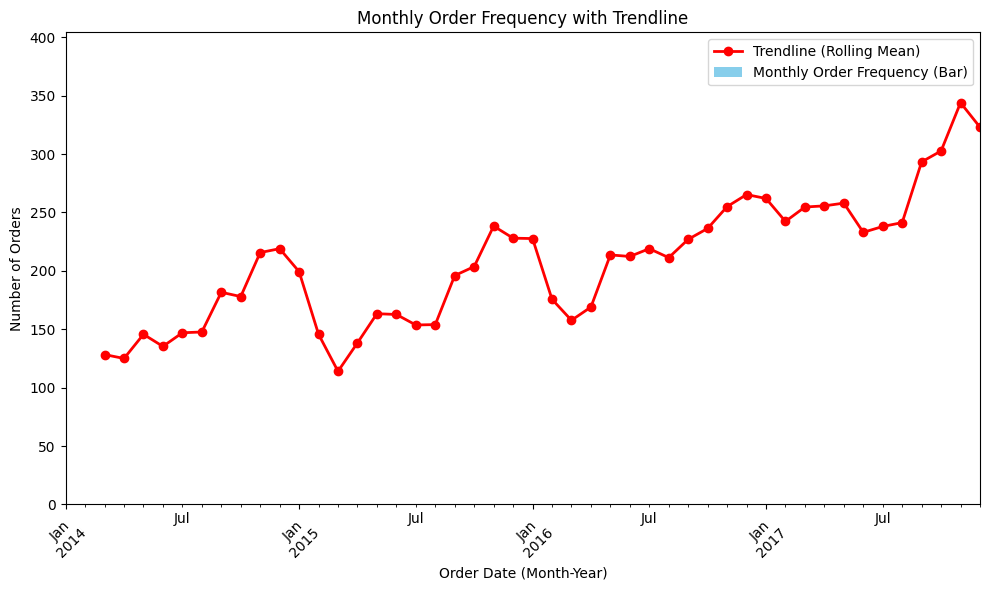

In [ ]:
order_frequency = data['Order Date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 6))
order_frequency.plot(kind='bar', color='skyblue', label='Monthly Order Frequency (Bar)')
order_frequency.rolling(window=3).mean().plot(kind='line', color='red', linewidth=2, marker='o', label='Trendline (Rolling Mean)')

plt.xlabel('Order Date (Month-Year)')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Frequency with Trendline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.savefig('monthly_order_frequency_with_trendline.png')
plt.show()
plt.close()


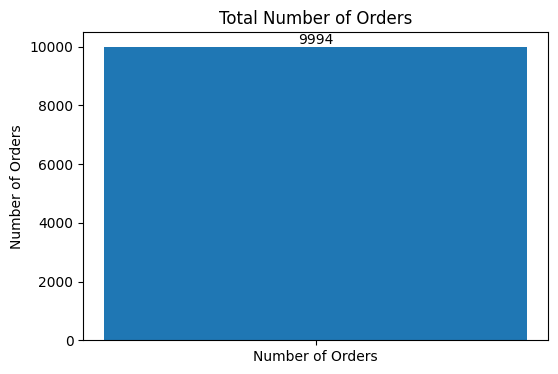

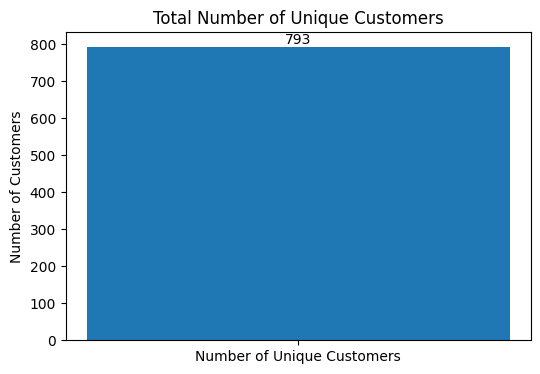

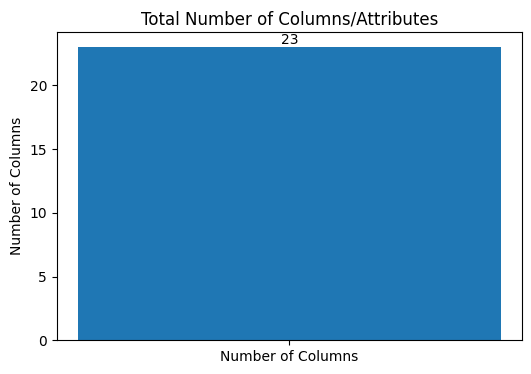

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar('Number of Orders', len(data))
plt.text('Number of Orders', len(data), str(len(data)), ha='center', va='bottom')
plt.ylabel('Number of Orders')
plt.title('Total Number of Orders')
plt.savefig('total_orders.png')
plt.show()
plt.close()

unique_customers = data['Customer ID'].nunique()
plt.figure(figsize=(6, 4))
plt.bar('Number of Unique Customers', unique_customers)
plt.text('Number of Unique Customers', unique_customers, str(unique_customers), ha='center', va='bottom')
plt.ylabel('Number of Customers')
plt.title('Total Number of Unique Customers')
plt.savefig('unique_customers.png')
plt.show()
plt.close()

num_columns = len(data.columns)
plt.figure(figsize=(6, 4))
plt.bar('Number of Columns', num_columns)
plt.text('Number of Columns', num_columns, str(num_columns), ha='center', va='bottom')
plt.ylabel('Number of Columns')
plt.title('Total Number of Columns/Attributes')
plt.savefig('num_columns.png')
plt.show()
plt.close()


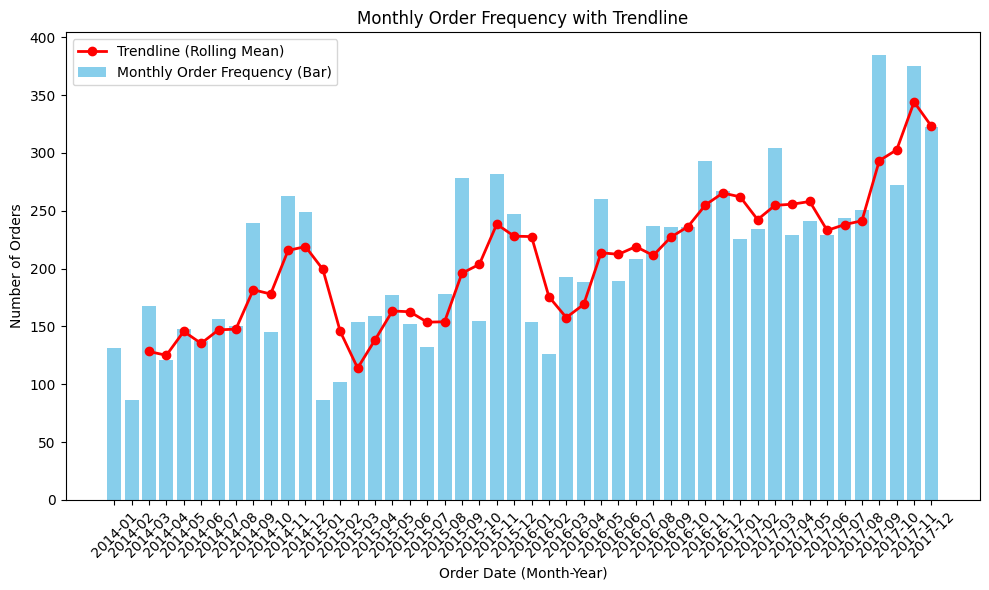

In [ ]:
order_frequency = data['Order Date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.bar(order_frequency.index.astype(str), order_frequency.values, color='skyblue', label='Monthly Order Frequency (Bar)')

rolling_mean = order_frequency.rolling(window=3).mean()
plt.plot(rolling_mean.index.astype(str), rolling_mean.values, color='red', linewidth=2, marker='o', label='Trendline (Rolling Mean)')

plt.xlabel('Order Date (Month-Year)')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Frequency with Trendline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.savefig('monthly_order_frequency_with_trendline.png')
plt.show()
plt.close()


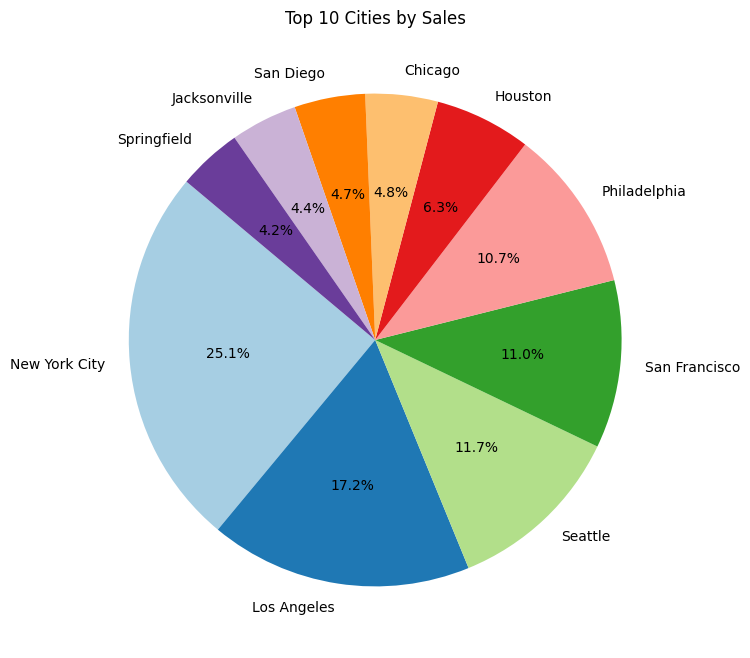

In [ ]:
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)

top_10_cities = city_sales.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Cities by Sales')
plt.savefig('top_10_cities_pie_chart.png')
plt.show()

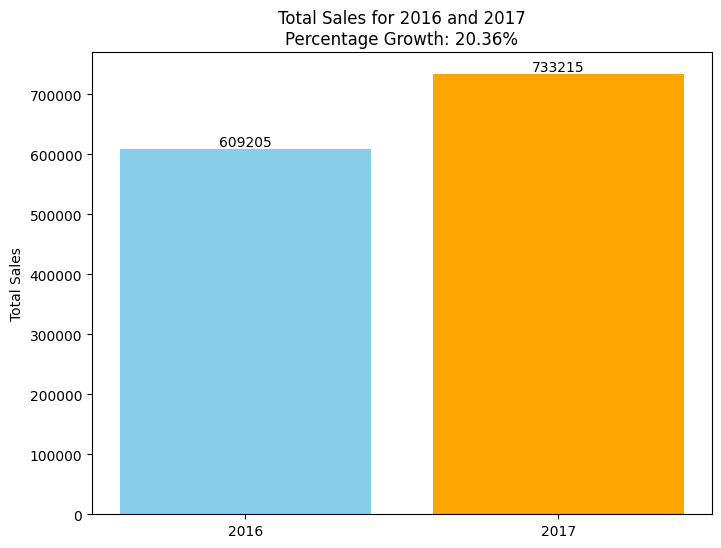

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(['2016', '2017'], [sales_2016, sales_2017], color=['skyblue', 'orange'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.ylabel('Total Sales')
plt.title('Total Sales for 2016 and 2017\nPercentage Growth: {:.2f}%'.format(percentage_growth))
plt.savefig('total_sales_2016_2017_with_values.png')
plt.show()
plt.close()


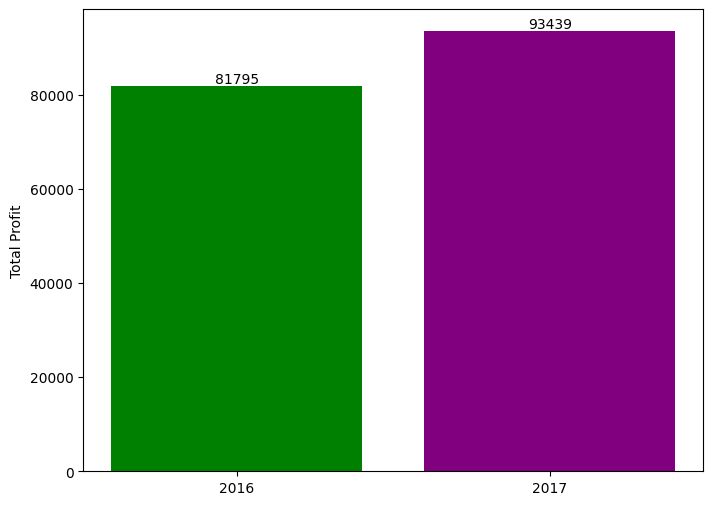

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data['Year'] = data['Order Date'].dt.year

profit_2016 = 81795.17430000001
profit_2017 = 93439.26960000001

profit_growth_percentage = 14.24
plt.figure(figsize=(8, 6))
bars = plt.bar(['2016', '2017'], [profit_2016, profit_2017], color=['green', 'purple'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.ylabel('Total Profit')
# plt.title('Profit for 2016 and 2017\nPercentage Growth: {:.2f}%'.format(profit_percentage_growth))
plt.savefig('profit_2016_2017_with_values.png')
plt.show()
plt.close()

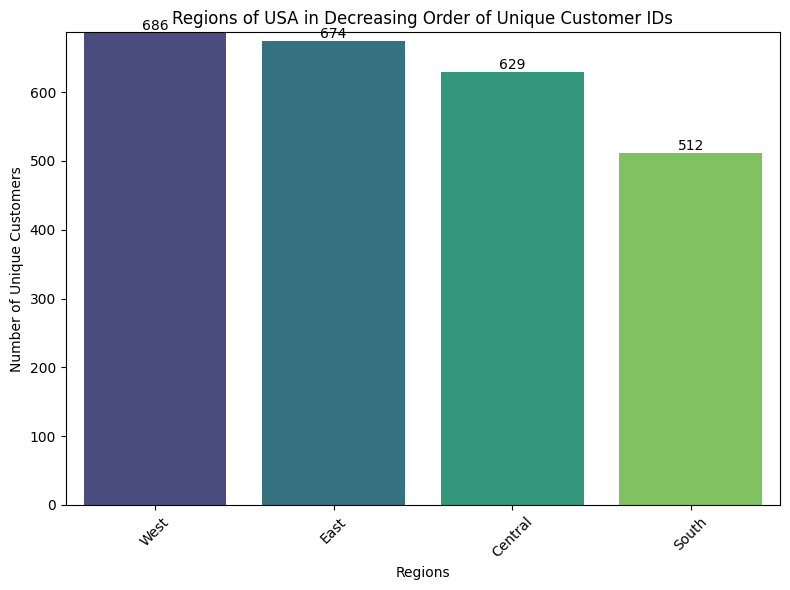

In [ ]:
import seaborn as sns
region_customer_counts = data.groupby('Region')['Customer ID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=region_customer_counts.index, y=region_customer_counts.values, palette='viridis')
plt.xlabel('Regions')
plt.ylabel('Number of Unique Customers')
plt.title('Regions of USA in Decreasing Order of Unique Customer IDs')
plt.xticks(rotation=45)

y_max = region_customer_counts.max() + 1  # Add 1 for space above the tallest bar
plt.ylim(0, y_max)

for i, v in enumerate(region_customer_counts.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('regions_ordered_by_customers_with_values.png')
plt.show()
plt.close()

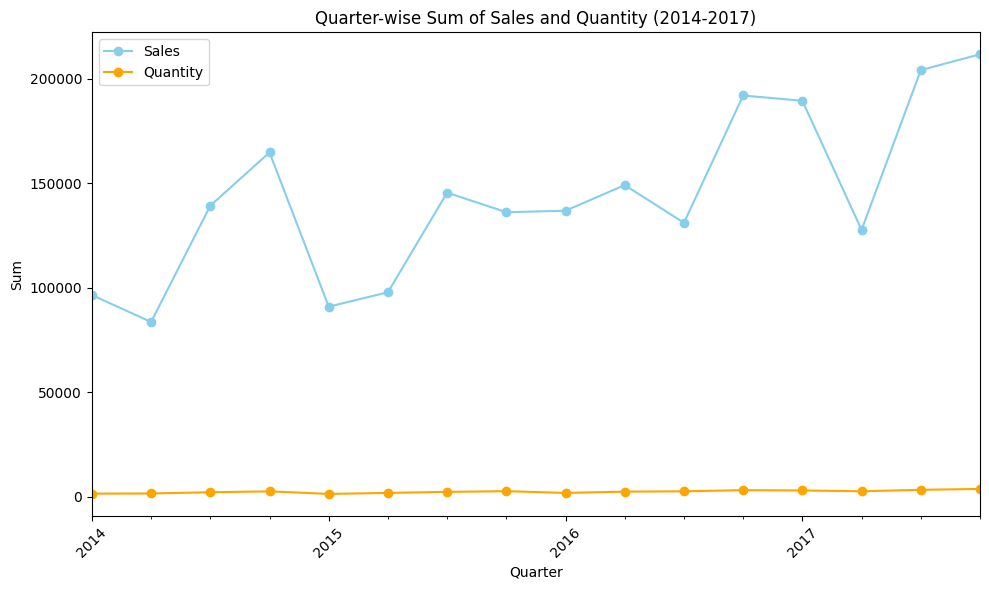

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Quarter'] = data['Order Date'].dt.to_period('Q')

quarterly_sales = data.groupby('Quarter')['Sales'].sum()
quarterly_quantity = data.groupby('Quarter')['Quantity'].sum()

plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='line', marker='o', label='Sales', color='skyblue')
quarterly_quantity.plot(kind='line', marker='o', label='Quantity', color='orange')
plt.xlabel('Quarter')
plt.ylabel('Sum')
plt.title('Quarter-wise Sum of Sales and Quantity (2014-2017)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('quarterly_sales_quantity.png')
plt.show()
plt.close()


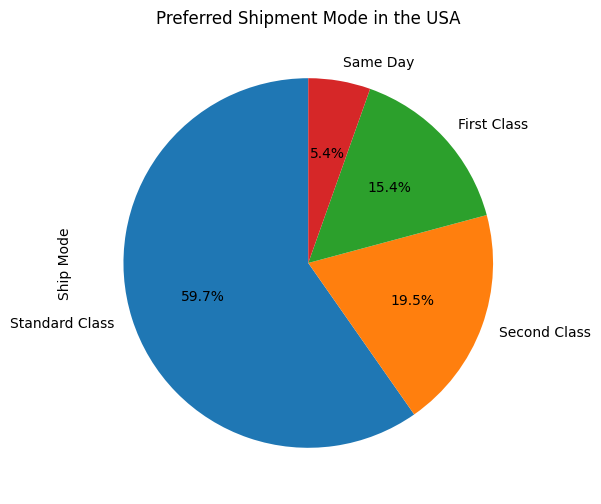

In [ ]:
shipment_mode_counts = data['Ship Mode'].value_counts()

plt.figure(figsize=(8, 6))
shipment_mode_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Preferred Shipment Mode in the USA')
plt.savefig('shipment_mode_preference.png')
plt.show()
plt.close()


<Figure size 1200x800 with 0 Axes>

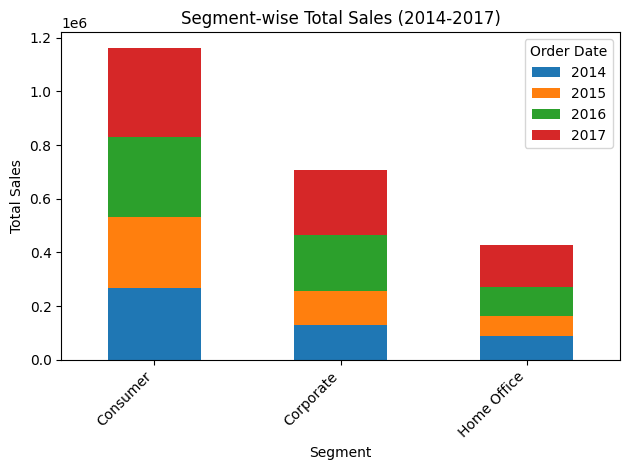

In [ ]:
segment_sales = data.groupby(['Segment', data['Order Date'].dt.year])['Sales'].sum().unstack()

plt.figure(figsize=(12, 8))
segment_sales.plot(kind='bar', stacked=True)
plt.ylabel('Total Sales')
plt.title('Segment-wise Total Sales (2014-2017)')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.savefig('segment_wise_sales.png')
plt.show()
plt.close()


<Figure size 1200x800 with 0 Axes>

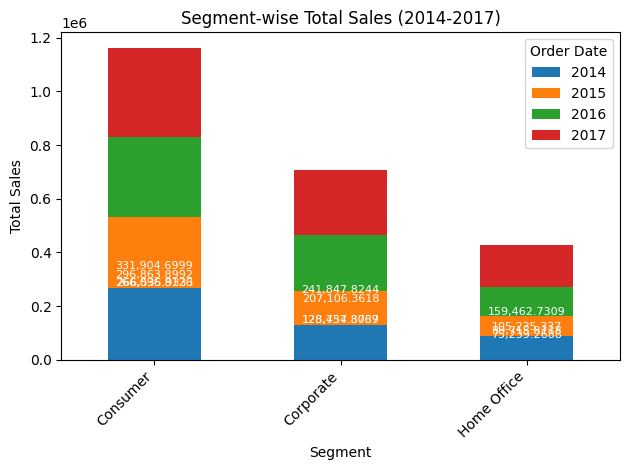

In [ ]:
segment_sales = data.groupby(['Segment', data['Order Date'].dt.year])['Sales'].sum().unstack()

plt.figure(figsize=(12, 8))
ax = segment_sales.plot(kind='bar', stacked=True)
plt.ylabel('Total Sales')
plt.title('Segment-wise Total Sales (2014-2017)')

plt.xticks(rotation=45, ha="right")

for i, segment in enumerate(segment_sales.index):
    for year, sales in zip(segment_sales.columns, segment_sales.loc[segment]):
        ax.text(i, sales + 200, f"{sales:,}", ha='center', va='bottom', fontsize=8, color='white')

plt.tight_layout()
plt.savefig('segment_wise_sales_with_values.png')
plt.show()
plt.close()


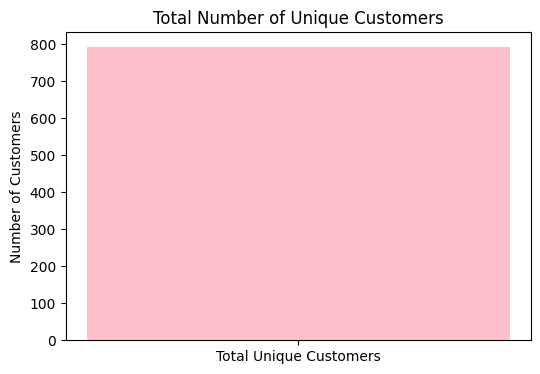

In [ ]:
unique_customers = data['Customer ID'].nunique()

plt.figure(figsize=(6, 4))
plt.bar('Total Unique Customers', unique_customers, color='pink')
plt.ylabel('Number of Customers')
plt.title('Total Number of Unique Customers')
plt.savefig('unique_customers.png')
plt.show()
plt.close()


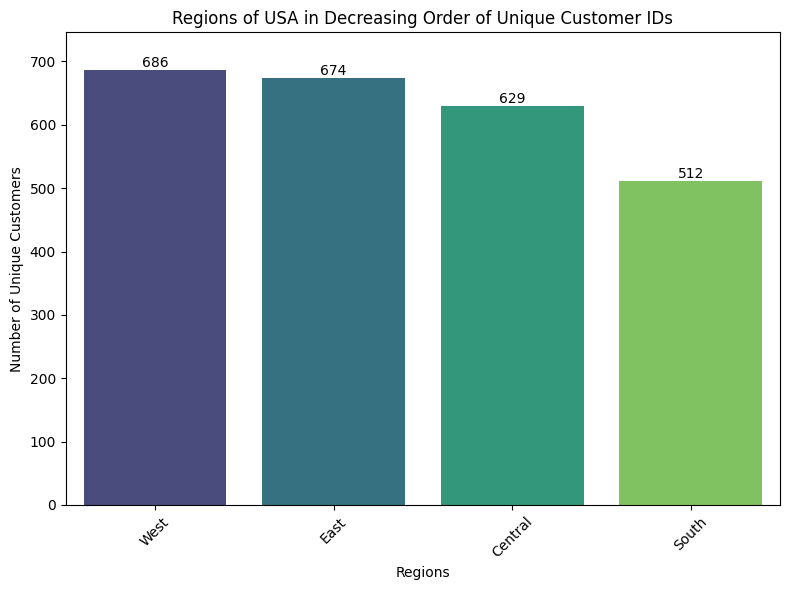

In [ ]:
region_customer_counts = data.groupby('Region')['Customer ID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=region_customer_counts.index, y=region_customer_counts.values, palette='viridis')
plt.xlabel('Regions')
plt.ylabel('Number of Unique Customers')
plt.title('Regions of USA in Decreasing Order of Unique Customer IDs')
plt.xticks(rotation=45)

y_max = region_customer_counts.max() + 60
plt.ylim(0, y_max)

for i, v in enumerate(region_customer_counts.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('regions_ordered_by_customers_with_values.png')
plt.show()
plt.close()


In [ ]:
unique_postal_codes = data[data['Postal Code'].astype(str).str.startswith(('8', '9'))]['Postal Code'].nunique()

plt.figure(figsize=(6, 4))
y_max = unique_postal_codes + 30
plt.ylim(0, y_max)

# Plot the bar
plt.bar('Total Unique Postal Codes', unique_postal_codes, color='salmon')

plt.text(0, unique_postal_codes + 5, str(unique_postal_codes), ha='center', va='bottom')

plt.ylabel('Number of Unique Postal Codes')
plt.title('Total Number of Unique Postal Codes Starting with 8 or 9')
plt.savefig('unique_postal_codes.png')
plt.close()


In [ ]:
average_purchase_value = data['Sales'].sum() / data['Customer ID'].nunique()

average_purchase_frequency = data['Order ID'].nunique() / data['Customer ID'].nunique()

customer_lifespan = 1

# Calculate CLV
clv = average_purchase_value * average_purchase_frequency * customer_lifespan

print("Customer Lifetime Value (CLV):", clv)

# Calculate number of orders per customer
orders_per_customer = data.groupby('Customer ID')['Order ID'].nunique()

print("Number of Orders per Customer:")
print(orders_per_customer)

top_20_customers = orders_per_customer.sort_values(ascending=False).head(20)

print("Top 20 Customers by Number of Orders:")
print(top_20_customers)

total_orders = data['Order ID'].nunique()

total_customers = data['Customer ID'].nunique()

orders_per_customer = total_orders / total_customers

print("Average Number of Orders per Customer:", orders_per_customer)



Customer Lifetime Value (CLV): 18298.00017053808
Number of Orders per Customer:
Customer ID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     6
AB-10015     3
            ..
XP-21865    11
YC-21895     5
YS-21880     8
ZC-21910    13
ZD-21925     5
Name: Order ID, Length: 793, dtype: int64
Top 20 Customers by Number of Orders:
Customer ID
EP-13915    17
ZC-21910    13
CK-12205    13
SH-19975    13
JE-15745    13
EA-14035    13
PG-18820    13
NS-18640    13
SJ-20125    12
EH-13765    12
LC-16885    12
CC-12220    12
RP-19390    12
KB-16585    12
KL-16645    12
CS-12250    12
AH-10690    12
KD-16495    12
PK-19075    12
BP-11095    12
Name: Order ID, dtype: int64
Average Number of Orders per Customer: 6.316519546027743


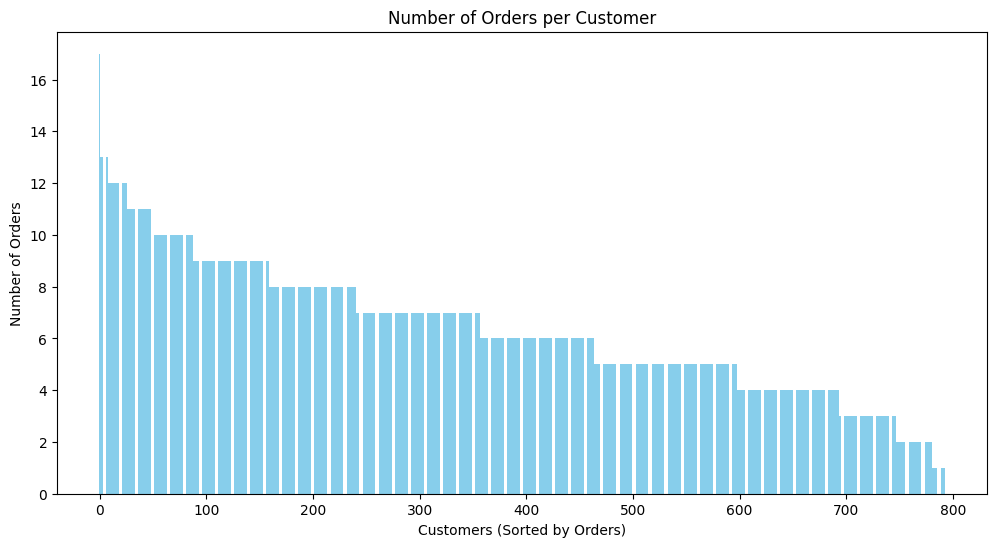

In [ ]:
orders_per_customer = data.groupby('Customer ID')['Order ID'].nunique()

sorted_orders = orders_per_customer.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_orders)), sorted_orders.values, color='skyblue')
plt.ylabel('Number of Orders')
plt.xlabel('Customers (Sorted by Orders)')
plt.title('Number of Orders per Customer')

# Save the image as a PNG file
plt.savefig('orders_per_customer.png')

# Display the plot
plt.show()
